In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
#Battery
Engine_Dim = 10
Battery_Dim = 10

# Hilbert space is oscillator x battery_l x battery_k
a = tensor(destroy(Engine_Dim),  identity(Battery_Dim),          identity(Battery_Dim)          )
L = tensor(identity(Engine_Dim), Qobj(np.eye(Battery_Dim,k=+1)), identity(Battery_Dim)          )
K = tensor(identity(Engine_Dim), Qobj(np.eye(Battery_Dim,k=-1)),          Qobj(np.eye(Battery_Dim,k=+1)) )


N = a.dag()*a
NL = tensor(identity(Engine_Dim), num(Battery_Dim),      identity(Battery_Dim) )
NK = tensor(identity(Engine_Dim), identity(Battery_Dim), num(Battery_Dim)      )

In [3]:
#Engine + Battery

#Engine Operators
#A = tensor(a,qeye(Battery_Dim**2))
#C = tensor(c,qeye(Battery_Dim**2))

#Battery Operators
#LU = tensor(qeye(2)qeye(2*Engine_Dim),Lup)
#LD = tensor(qeye(2*Engine_Dim),Ldown)
#KU = tensor(qeye(2*Engine_Dim),Kup)
#KD = tensor(qeye(2*Engine_Dim),Kdown)
#NL = tensor(qeye(2*Engine_Dim),NumL)
#NK = tensor(qeye(2*Engine_Dim),NumK)

In [4]:
#Hamiltonian of Engine
omega = 1.0
H_e = omega*a.dag()*a

#Hamiltonian of battery
omega_m = 1.0
H_b = omega_m*(NL+NK)

#Interaction Hamiltonian
Coupling = 1.0
H_c = Coupling*(L.dag()*a + a.dag()*L)

# Total Hamiltonian
H = H_e + H_b + H_c

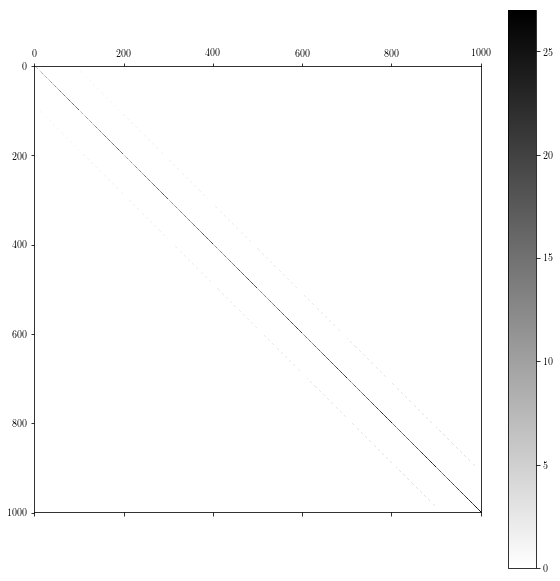

In [5]:
plt.figure(1,figsize=[10,10])
plt.matshow(np.real(H.data.toarray()),fignum=1, cmap=plt.cm.gray_r)
plt.colorbar()
#np.real(H.data.toarray())

In [6]:
def battery(j,k,Dim=1000):
    l=j-k
    state = tensor( basis(Dim,l), basis(Dim,k) )
    return state

def ket_battery(state):
    l = expect(NumL,state)
    k = expect(NumK,state)
    return l+k,k

In [117]:
oscillator_init = tensor( displace(Engine_Dim,0)*basis(Engine_Dim,4))
battery_init = battery(0,0,Dim=Battery_Dim)
psi0 = tensor(oscillator_init,battery_init)

times = np.linspace(0.0,10.0,1000)

gamma = 2.0
C0 = np.sqrt(gamma)*K.dag()
opts = Options(ntraj=500,average_expect=False)
result = mcsolve(H, psi0, times, c_ops=[C0], e_ops=[N,NL,NK],options=opts)

10.0%. Run time:   1.95s. Est. time left: 00:00:00:17
20.0%. Run time:   3.75s. Est. time left: 00:00:00:14
30.0%. Run time:   5.68s. Est. time left: 00:00:00:13
40.0%. Run time:   7.63s. Est. time left: 00:00:00:11
50.0%. Run time:   9.59s. Est. time left: 00:00:00:09
60.0%. Run time:  11.42s. Est. time left: 00:00:00:07
70.0%. Run time:  13.26s. Est. time left: 00:00:00:05
80.0%. Run time:  15.07s. Est. time left: 00:00:00:03
90.0%. Run time:  16.88s. Est. time left: 00:00:00:01
100.0%. Run time:  18.78s. Est. time left: 00:00:00:00
Total run time:  18.80s


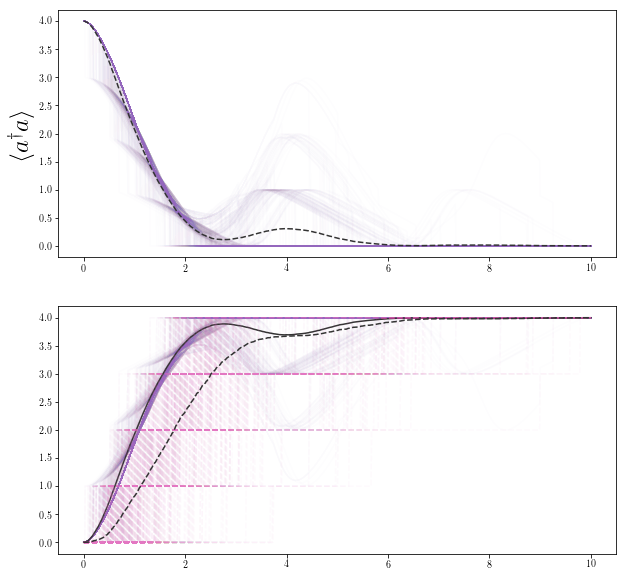

In [157]:
expect = np.array(result.expect)
n = expect[:,0,:].T
l = expect[:,1,:].T
k = expect[:,2,:].T
j = l+k
pick = 100
Fig, ax = plt.subplots(2,figsize=[10,10])
ax[0].plot(times,n,'C4',alpha=0.01)
#ax[0].plot(times,n[:,pick],'C3',alpha=1.0)
ax[0].plot(times,np.mean(n,1),'--',color='0.2',alpha=1.0)
ax[0].set_ylabel(r'$\langle a^\dagger a \rangle$',fontsize=25)

ax[1].plot(times,j,'C4',alpha=0.01, label=r'$j$')
#ax[1].plot(times,j[:,pick],'C3',alpha=1.0, label=r'$j$')
ax[1].plot(times,np.mean(j,1),color='0.2',alpha=1.0, label=r'$j$')

ax[1].plot(times,k,'C6--',alpha=0.03,label=r'$k$')
#ax[1].plot(times,k[:,pick],'C3--',alpha=1.0, label=r'$j$')
ax[1].plot(times,np.mean(k,1),'--',color='0.2',alpha=1.0, label=r'$j$')
plt.show()

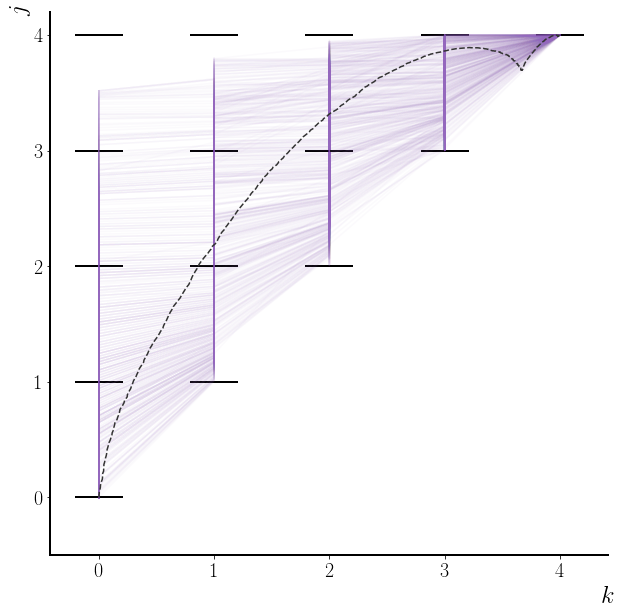

In [172]:
jmax=5
plt.figure(figsize=[10,10])
ax = plt.gca()
# Ploting the levels
for jcount in range(jmax):
    for kcount in range(jcount+1):
        ax.plot([-0.2+kcount,0.2+kcount],[jcount,jcount],'k',lw=2)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_lw(2)
ax.spines['bottom'].set_lw(2)

ymin,ymax = ax.get_ylim()
ax.set_ylim([-0.5,ymax])
ax.set_xticks(range(jmax))
ax.set_yticks(range(jmax))
ax.tick_params(labelsize=20)

ax.set_xlabel(r'$k$', fontsize=25, x=1,y=1)
ax.set_ylabel(r'$j$', fontsize=25, x=1,y=1)

pick=10
ax.plot(k,j,'C4',alpha=0.03)
#ax.plot(k[:,pick],j[:,pick],'C3',alpha=1)
ax.plot(np.mean(k,1),np.mean(j,1),'--',color='0.2',alpha=1)
plt.show()
#np.shape(k)

In [161]:
Ktilde_p = K + 0.5*K*(a*L.dag() + a.dag()*L)
Ktilde_m = K - 0.5*K*(a*L.dag() + a.dag()*L)

In [166]:
oscillator_init = tensor( displace(Engine_Dim,0)*basis(Engine_Dim,4))
battery_init = battery(0,0,Dim=Battery_Dim)
psi0 = tensor(oscillator_init,battery_init)

times = np.linspace(0.0,10.0,1000)

gamma = 2.0
C0 = np.sqrt(gamma)*Ktilde_p.dag()
C1 = np.sqrt(gamma)*Ktilde_m.dag()
opts = Options(ntraj=500,average_expect=False)
result = mcsolve(H, psi0, times, c_ops=[C0,C1], e_ops=[N,NL,NK],options=opts)

10.0%. Run time:   2.01s. Est. time left: 00:00:00:18
20.0%. Run time:   3.95s. Est. time left: 00:00:00:15
30.0%. Run time:   6.05s. Est. time left: 00:00:00:14
40.0%. Run time:   7.89s. Est. time left: 00:00:00:11
50.0%. Run time:   9.87s. Est. time left: 00:00:00:09
60.0%. Run time:  11.96s. Est. time left: 00:00:00:07
70.0%. Run time:  13.80s. Est. time left: 00:00:00:05
80.0%. Run time:  15.86s. Est. time left: 00:00:00:03
90.0%. Run time:  18.03s. Est. time left: 00:00:00:02
100.0%. Run time:  20.07s. Est. time left: 00:00:00:00
Total run time:  20.16s


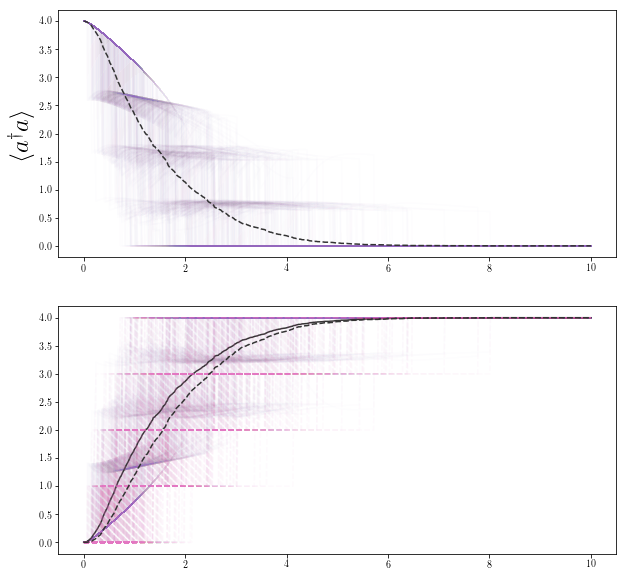

In [167]:
expect_c = np.array(result.expect)
n_c = expect_c[:,0,:].T
l_c = expect_c[:,1,:].T
k_c = expect_c[:,2,:].T
j_c = l_c + k_c
pick = 100
Fig, ax = plt.subplots(2,figsize=[10,10])
ax[0].plot(times,n_c,'C4',alpha=0.01)
#ax[0].plot(times,n[:,pick],'C3',alpha=1.0)
ax[0].plot(times,np.mean(n_c,1),'--',color='0.2',alpha=1.0)
ax[0].set_ylabel(r'$\langle a^\dagger a \rangle$',fontsize=25)

ax[1].plot(times,j_c,'C4',alpha=0.01, label=r'$j$')
#ax[1].plot(times,j[:,pick],'C3',alpha=1.0, label=r'$j$')
ax[1].plot(times,np.mean(j_c,1),color='0.2',alpha=1.0, label=r'$j$')

ax[1].plot(times,k_c,'C6--',alpha=0.03,label=r'$k$')
#ax[1].plot(times,k[:,pick],'C3--',alpha=1.0, label=r'$j$')
ax[1].plot(times,np.mean(k_c,1),'--',color='0.2',alpha=1.0, label=r'$j$')
plt.show()

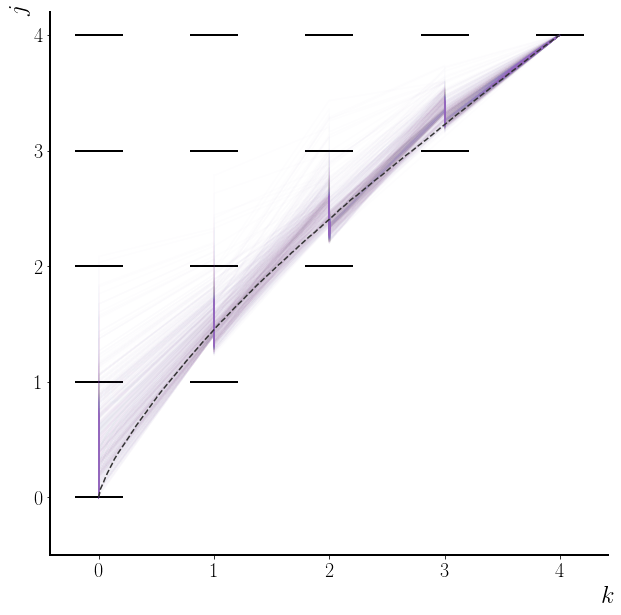

In [171]:
jmax=5
plt.figure(figsize=[10,10])
ax = plt.gca()
# Ploting the levels
for jcount in range(jmax):
    for kcount in range(jcount+1):
        ax.plot([-0.2+kcount,0.2+kcount],[jcount,jcount],'k',lw=2)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_lw(2)
ax.spines['bottom'].set_lw(2)

ymin,ymax = ax.get_ylim()
ax.set_ylim([-0.5,ymax])
ax.set_xticks(range(jmax))
ax.set_yticks(range(jmax))
ax.tick_params(labelsize=20)

ax.set_xlabel(r'$k$', fontsize=25, x=1,y=1)
ax.set_ylabel(r'$j$', fontsize=25, x=1,y=1)

pick=10
ax.plot(k_c,j_c,'C4',alpha=0.01)
#ax.plot(k_c[:,pick],j_c[:,pick],'C3',alpha=1)
ax.plot(np.mean(k_c,1),np.mean(j_c,1),'--',color='0.2',alpha=1)
plt.show()

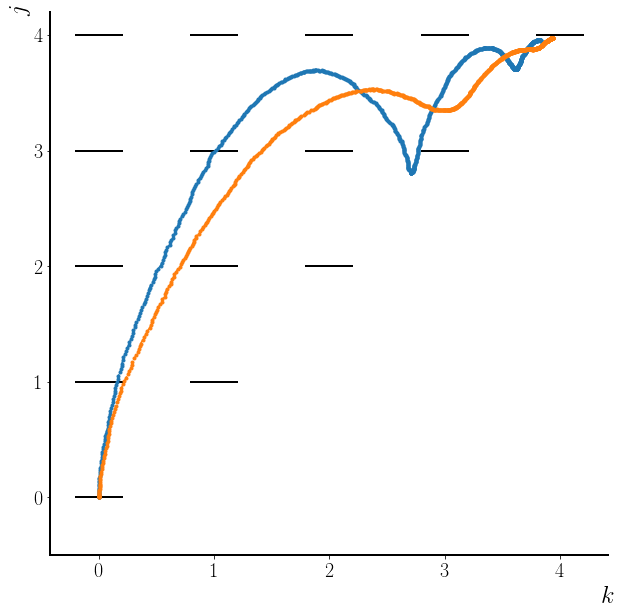

In [110]:
jmax=5
plt.figure(figsize=[10,10])
ax = plt.gca()
# Ploting the levels
for jcount in range(jmax):
    for kcount in range(jcount+1):
        ax.plot([-0.2+kcount,0.2+kcount],[jcount,jcount],'k',lw=2)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_lw(2)
ax.spines['bottom'].set_lw(2)

ymin,ymax = ax.get_ylim()
ax.set_ylim([-0.5,ymax])
ax.set_xticks(range(jmax))
ax.set_yticks(range(jmax))
ax.tick_params(labelsize=20)

ax.set_xlabel(r'$k$', fontsize=25, x=1,y=1)
ax.set_ylabel(r'$j$', fontsize=25, x=1,y=1)

ax.plot(k,j,'.--')
ax.plot(k_c,j_c,'.--')

In [11]:
state2.dag()*Lup*Ldown*state2

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[ 1.]]

In [73]:
l.data.toarray()[0][0].real

0.0

In [129]:
import sys
print(sys.version)

3.5.2 |Anaconda 4.3.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
